# Image plotting

This notebook reproduces the plotting of the radio images in the main paper: Figures 1, 2, and 6, where the latter two are composites based on the panels created in this notebook. 

## 0) Loading the relevant packages

In [18]:
import matplotlib.pyplot as plt
import aplpy
from astropy import units as u
from astropy.io import fits

%matplotlib inline

single_col = 8.9 # cm
double_col = 18.3 # cm

def cm2inch(value):
    return value/2.54

FS = 22
LS = 22
MS = 14
MEW= 1.5

CM = 'inferno_r'
CM_check = 'viridis_r'

# Filter recurring aplpy warning that does not affect the resulting images:
import warnings
warnings.filterwarnings("ignore", category=Warning)

## 1) Plotting the full field image with 3.5 k$\lambda$ minimum uvrange cut

We will use aplpy (https://aplpy.readthedocs.io/) to produce all images. For this purpose, we have converted the .image files created by CASA into .fits files using exportfits() in CASA.

Note that this requires the dropdeg=True option in exportfits, as otherwise aplpy does not correctly deal with the (empty) Stokes and Frequency axes of the .image file.

In [25]:
data = "ImageFitsFiles/images_per_scan.ALL.im1.fits"

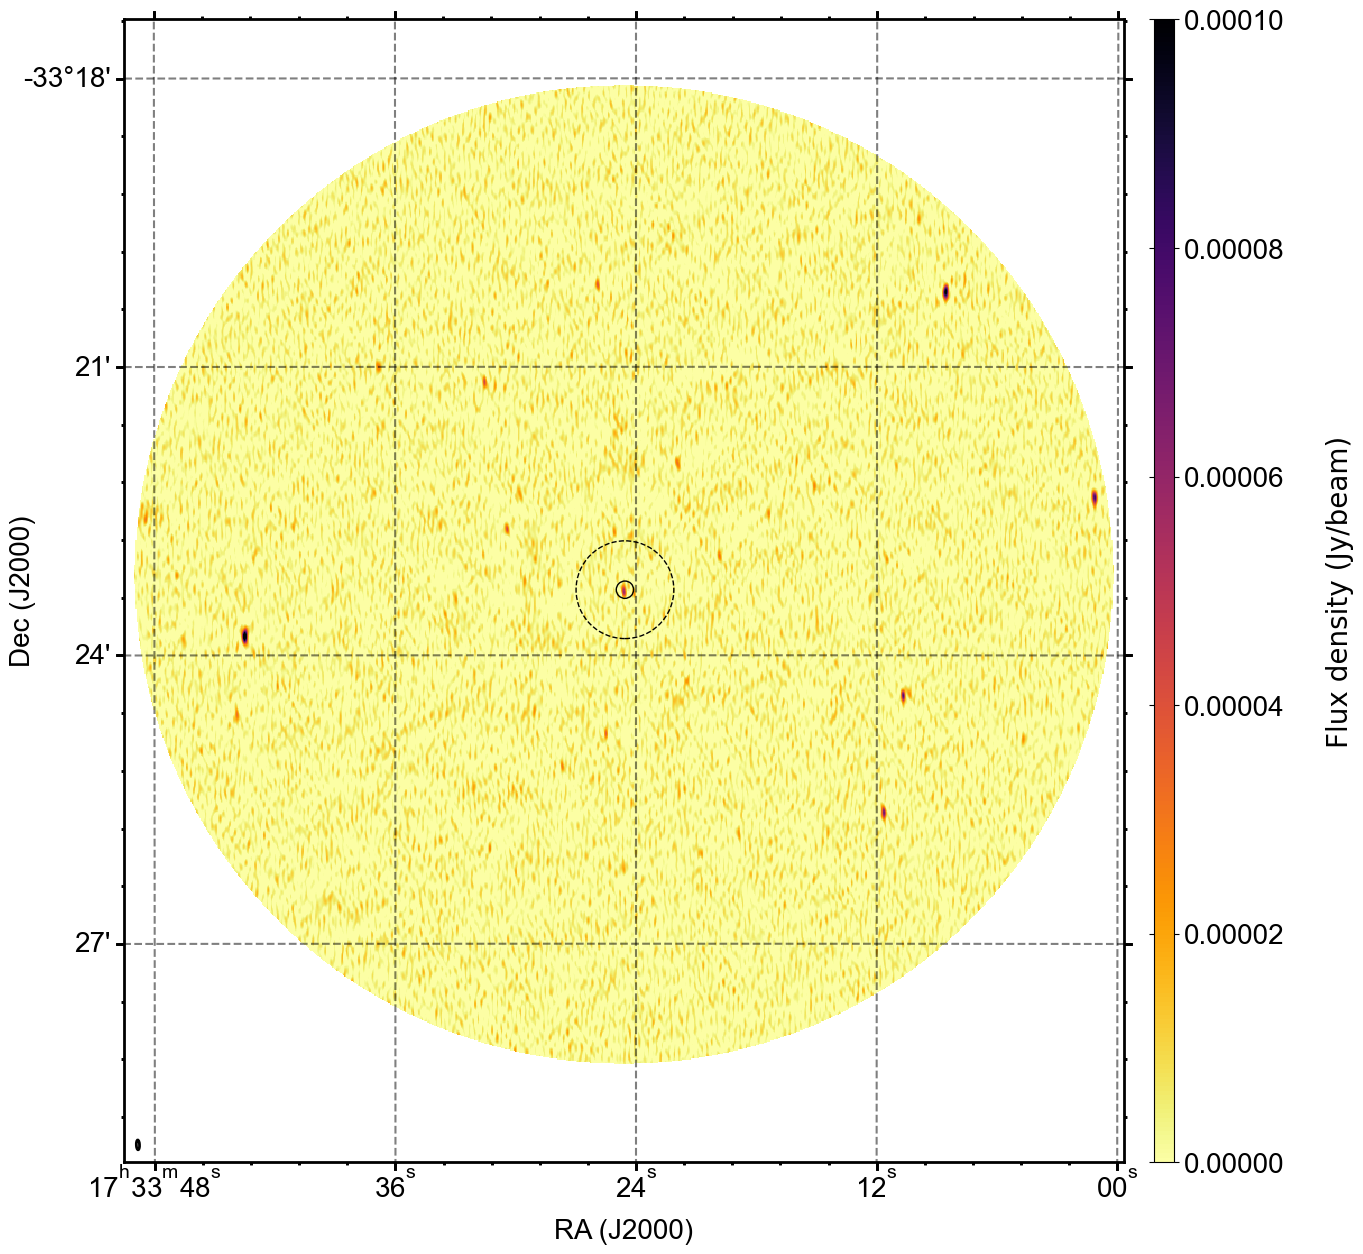

In [26]:
fig = plt.figure(figsize=(15,15))

# Loading the data into the figure
cg = aplpy.FITSFigure(data, figure=fig, subplot=[0.15, 0.15, 0.7, 0.8])

# Setting the colorscale and range:
cg.show_colorscale(cmap=CM,vmin=0.0,vmax=1e-4)

# The source coordinates to centre the image on:
ra = 263.352542
dec = -33.388833

cg.recenter(ra, dec, radius=5.2*60./(60.*60.))  # radius is given in degrees, we want 10"

# Open the fits image to read in the beam parameters
hdul = fits.open(data)
    
BMAJ = (hdul[0].header['BMAJ']*u.deg).to(u.arcsecond)
BMIN = (hdul[0].header['BMIN']*u.deg).to(u.arcsecond)
BPA = (hdul[0].header['BPA']*u.deg)
    
hdul.close()
    
# Adding the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(BMAJ)
cg.beam.set_minor(BMIN)
cg.beam.set_angle(BPA)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(2)

# Plotting the relevant core and halflight radii of the Liller 1 cluster using region files defined in DS9. 
cg.show_regions('REGIONFILES/core_ds9.reg')
cg.show_regions('REGIONFILES/halflight_ds9.reg')

# Setting the properties of the labels and axes ticks
cg.axis_labels.set_xpad(1)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=20, weight='medium',
                        stretch='normal', family='arial',
                        style='normal', variant='normal')
cg.tick_labels.set_font(size=20, weight='medium',
                        stretch='normal', family='arial',
                        style='normal', variant='normal')
cg.ticks.set_length(6)
cg.ticks.set_linewidth(2)
cg.ticks.set_color('black')

cg.frame.set_linewidth(2)  # points
cg.frame.set_color('black')

# Define the properties of the grid
cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle('--')
cg.grid.set_linewidth(1.5)

# Adding the colorbar:
cg.add_colorbar()
cg.colorbar.set_location('right')
cg.colorbar.set_width(0.2)
cg.colorbar.set_pad(0.3)
cg.colorbar.set_font(size=20, weight='medium', 
                          stretch='normal', family='arial', 
                          style='normal', variant='normal')
cg.colorbar.set_axis_label_text(r'Flux density (Jy/beam)')
cg.colorbar.set_axis_label_font(size=20)
cg.colorbar.set_axis_label_pad(30)

cg.colorbar.set_label_properties()

# Saving the image of the full field:
plt.savefig('Figure1.pdf', dpi=500)

## 2) Plotting zooms of the field of view with different uvrange cuts

### Note: the three panels are later combined into a single plot, included in this folder, called Figure2.pdf

In [8]:
images = ["ImageFitsFiles/RB_Cband.UVcut_max20klambda.im1.image.dropdeg.fits",
          "ImageFitsFiles/RB_Cband.UVcut_min20klambda.im1.image.dropdeg.fits",
          "ImageFitsFiles/images_per_scan.ALL.im1.fits"]

In [14]:
def Figure2(data, filename):
    
    fig = plt.figure(figsize=(7,7))

    # Loading the data into the figure
    cg = aplpy.FITSFigure(data, figure=fig, subplot=[0.15, 0.15, 0.7, 0.8])

    # Setting the colorscale and range:
    cg.show_colorscale(cmap=CM,vmin=0.0,vmax=1e-4)

    # The source coordinates to centre the image on:
    ra = 263.352542
    dec = -33.388833

    cg.recenter(ra, dec, radius=1.6*60./(60.*60.))  # radius is given in degrees, we want 10"
    #cg.show_markers(ra, dec, layer='marker_set_1', edgecolor=None, facecolor='g', marker='+', s=5000)

    # Open the fits image to read in the beam parameters
    hdul = fits.open(data)

    BMAJ = (hdul[0].header['BMAJ']*u.deg).to(u.arcsecond)
    BMIN = (hdul[0].header['BMIN']*u.deg).to(u.arcsecond)
    BPA = (hdul[0].header['BPA']*u.deg)

    hdul.close()

    # Adding the beam
    cg.add_beam()
    cg.beam.show()
    cg.beam.set_major(BMAJ)
    cg.beam.set_minor(BMIN)
    cg.beam.set_angle(BPA)
    cg.beam.set_corner('bottom left')
    cg.beam.set_linestyle('-')
    cg.beam.set_edgecolor('k')
    cg.beam.set_facecolor('w')
    cg.beam.set_linewidth(2)
    
    # Plotting the relevant core and halflight radii of the Liller 1 cluster using region files defined in DS9. 
    cg.show_regions('REGIONFILES/core_ds9.reg')
    cg.show_regions('REGIONFILES/halflight_ds9.reg')

    # Setting the properties of the labels and axes ticks
    cg.axis_labels.set_xpad(1)
    cg.axis_labels.set_ypad(0)
    cg.axis_labels.set_font(size=20, weight='medium',
                            stretch='normal', family='arial',
                            style='normal', variant='normal')
    cg.tick_labels.set_font(size=20, weight='medium',
                            stretch='normal', family='arial',
                            style='normal', variant='normal')
    cg.ticks.set_length(6)
    cg.ticks.set_linewidth(2)
    cg.ticks.set_color('black')

    cg.frame.set_linewidth(2)  # points
    cg.frame.set_color('black')

    # Define the properties of the grid
    cg.add_grid()
    cg.grid.show()
    cg.grid.set_color('k')
    cg.grid.set_linestyle('--')
    cg.grid.set_linewidth(1.5)

    # Colorbar:
    cg.add_colorbar()
    cg.colorbar.set_location('right')
    cg.colorbar.set_width(0.2)
    cg.colorbar.set_pad(0.3)
    cg.colorbar.set_font(size=20, weight='medium', 
                              stretch='normal', family='arial', 
                              style='normal', variant='normal')
    cg.colorbar.set_axis_label_text(r'Flux density (Jy/beam)')
    cg.colorbar.set_axis_label_font(size=20)
    cg.colorbar.set_axis_label_pad(30)
    cg.colorbar.set_ticks([])

    cg.colorbar.set_label_properties()

    plt.savefig(filename, dpi=500)


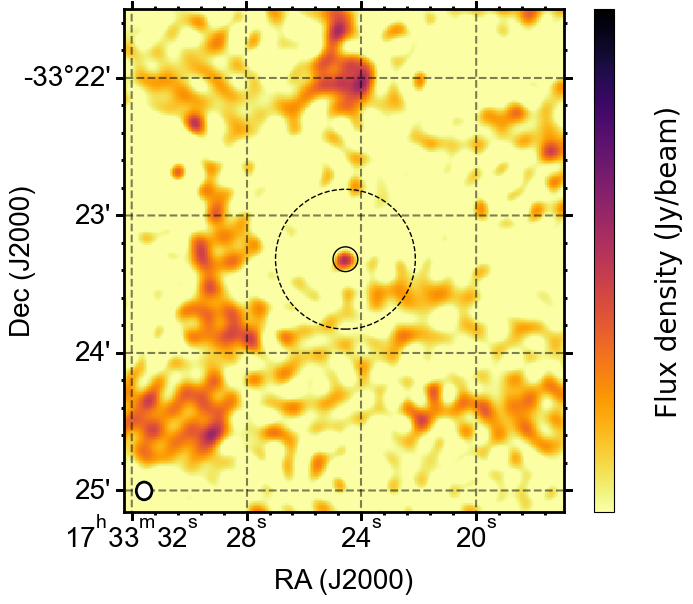

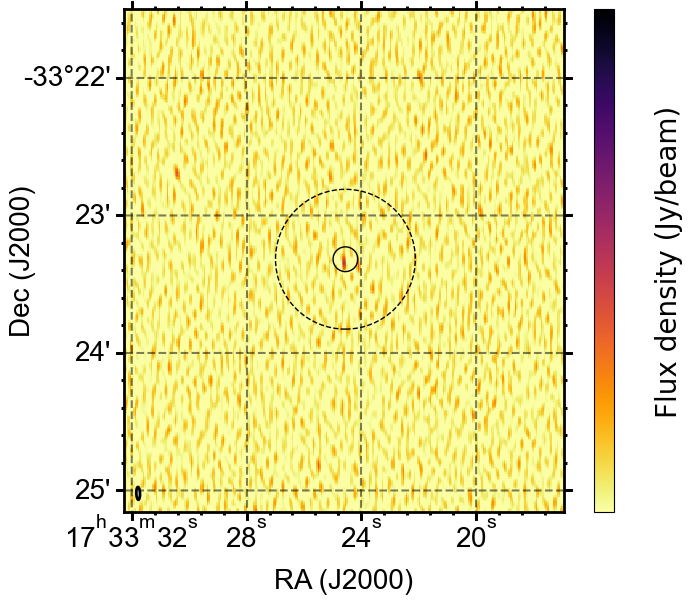

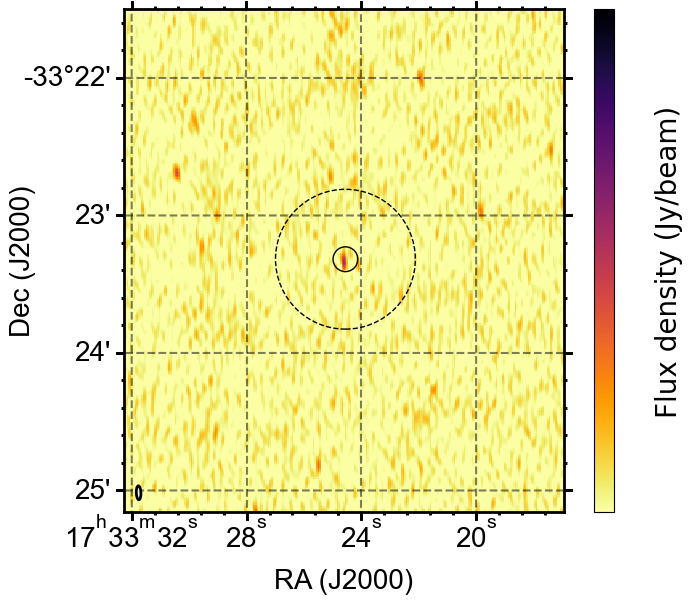

In [19]:
Figure2(images[0], filename='Figure2_leftpanel.pdf')
Figure2(images[1], filename='Figure2_middlepanel.pdf')
Figure2(images[2], filename='Figure2_rightpanel.pdf')

## 3) Plotting the images per scan for the Rapid Burster and the check source

### Note: similar to Figure 2, the two images are combined to create Figure 6, included in this folder as Figure6.pdf

In [23]:
def Figure6(ra, dec, filename, cmap):
    
    scans = ['ALL',5,7,9,11,13,15,17,19,23,25,27]

    N = 12 # The number of panels per source: number of scans + 1
    M = N/2

    # Define the figure and the size of the panels:
    fig = plt.figure(figsize=((N/2)*10,20))

    X0 = 0.18
    DELTA_X = 0.1
    WIDTH = 1./M - 2.*X0/(M**2) - DELTA_X / M
    Y1 = 0.525
    Y2 = 0.075
    dY = 0.40

    # Loop over the panels:
    i = 0
    for scan in scans[0:N]:
        SCAN = str(scan)
        print('Plotting scan', SCAN)

        # Load the data
        data = "ImageFitsFiles/images_per_scan."+SCAN+".im1.fits"

        # Define the extend of the image correctly:
        if i < M:
            Y = Y1
            j = i
        else:
            Y = Y2
            j = i-M

        X = X0/M + j*WIDTH + j*DELTA_X/M
        cg = aplpy.FITSFigure(data, figure=fig, subplot=[X, Y, WIDTH, dY])
        i = i+1

        # Setting the colorscale and range:
        cg.show_colorscale(cmap=cmap,vmin=0.0,vmax=1e-4)

        # Center on the appropiate target:
        cg.recenter(ra, dec, radius=15./(60.*60.))  # radius is given in degrees, we want 10"
        cg.show_markers(ra, dec, layer='marker_set_1', edgecolor=None, facecolor='g', marker='o', s=620)

        # Read in the beam properties:
        hdul = fits.open(data)

        BMAJ = (hdul[0].header['BMAJ']*u.deg).to(u.arcsecond)
        BMIN = (hdul[0].header['BMIN']*u.deg).to(u.arcsecond)
        BPA = (hdul[0].header['BPA']*u.deg)

        hdul.close()

        # Adding the beam
        cg.add_beam()
        cg.beam.show()
        cg.beam.set_major(BMAJ)
        cg.beam.set_minor(BMIN)
        cg.beam.set_angle(BPA)
        cg.beam.set_corner('bottom left')
        cg.beam.set_linestyle('-')
        cg.beam.set_edgecolor('k')
        cg.beam.set_facecolor('w')
        cg.beam.set_linewidth(2)

        # Setting the properties of the labels and axes ticks
        cg.axis_labels.set_xpad(1)
        cg.axis_labels.set_ypad(-2)

        cg.axis_labels.set_font(size=34, weight='medium',
                                 stretch='normal', family='arial',
                                 style='normal', variant='normal')
        cg.tick_labels.set_font(size=38, weight='medium',
                                 stretch='normal', family='arial',
                                 style='normal', variant='normal')

        cg.ticks.set_length(12)
        cg.ticks.set_linewidth(0)
        cg.ticks.set_color('black')

        # Only show the appropiate axies labels:
        if i != 1 and i != 7:
            cg.axis_labels.hide_y()
            cg.tick_labels.hide_y()
        if i < 7: # (since we already did i=i+1)
            cg.axis_labels.hide_x()
            cg.tick_labels.hide_x()

        cg.frame.set_linewidth(2)  # points
        cg.frame.set_color('black')

        # Define the properties of the grid
        cg.add_grid()
        cg.grid.show()
        cg.grid.set_color('k')
        cg.grid.set_linestyle('--')
        cg.grid.set_linewidth(1.5)
        cg.grid.set_xspacing(12./(60.*60.))

        # Colorbar:
        if i == M or i == N:
            cg.add_colorbar()
            cg.colorbar.set_location('right')
            cg.colorbar.set_width(0.2)
            cg.colorbar.set_pad(0.3)
            cg.colorbar.set_font(size=30, weight='medium', 
                                 stretch='normal', family='arial', 
                                 style='normal', variant='normal')
            cg.colorbar.set_axis_label_text(r'Flux density (uJy/beam)')
            cg.colorbar.set_axis_label_font(size=30)
            cg.colorbar.set_axis_label_pad(30)
            cg.colorbar.set_ticks([0, 25e-6, 50e-6, 75e-6, 100e-6])
            cg.colorbar.set_labels([0,25,50,75,100])

    # Save figure
    plt.savefig(filename, dpi=300, bbox_inches="tight")

Plotting scan ALL
Plotting scan 5
Plotting scan 7
Plotting scan 9
Plotting scan 11
Plotting scan 13
Plotting scan 15
Plotting scan 17
Plotting scan 19
Plotting scan 23
Plotting scan 25
Plotting scan 27
Plotting scan ALL
Plotting scan 5
Plotting scan 7
Plotting scan 9
Plotting scan 11
Plotting scan 13
Plotting scan 15
Plotting scan 17
Plotting scan 19
Plotting scan 23
Plotting scan 25
Plotting scan 27


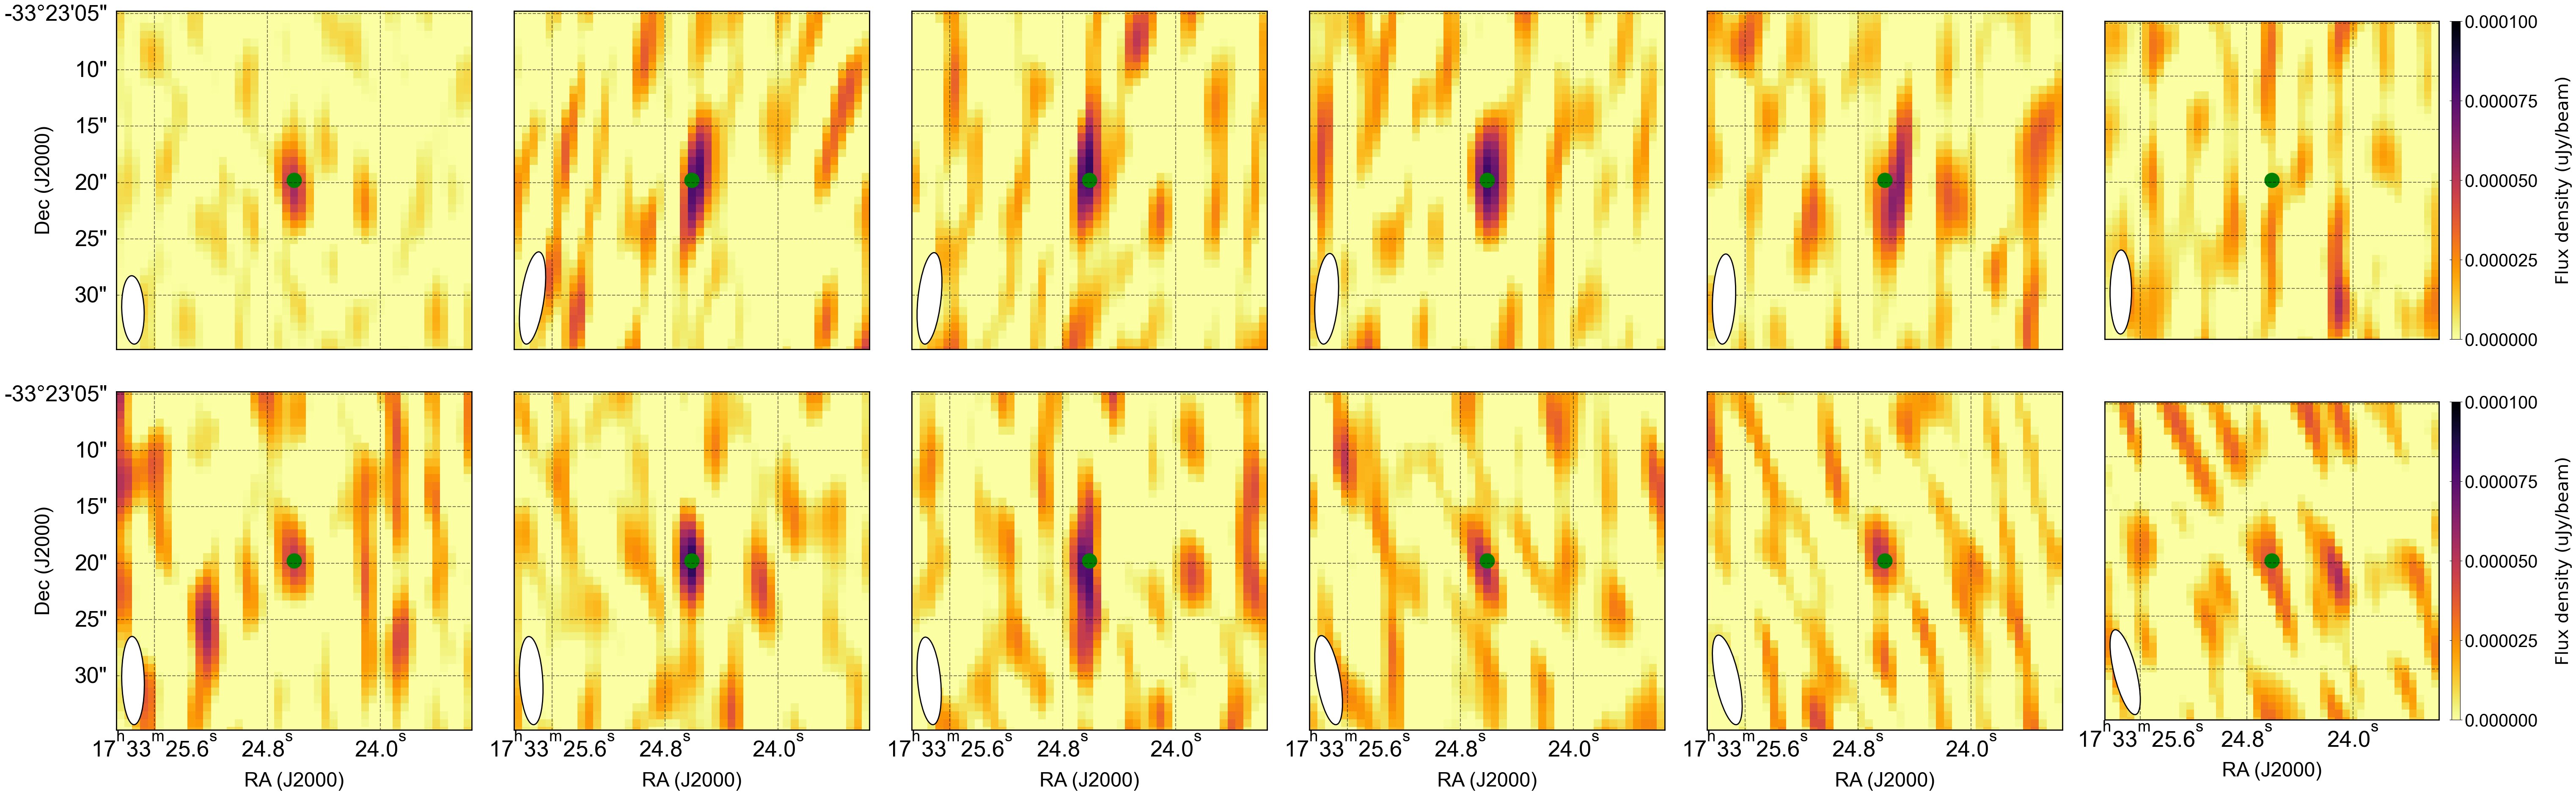

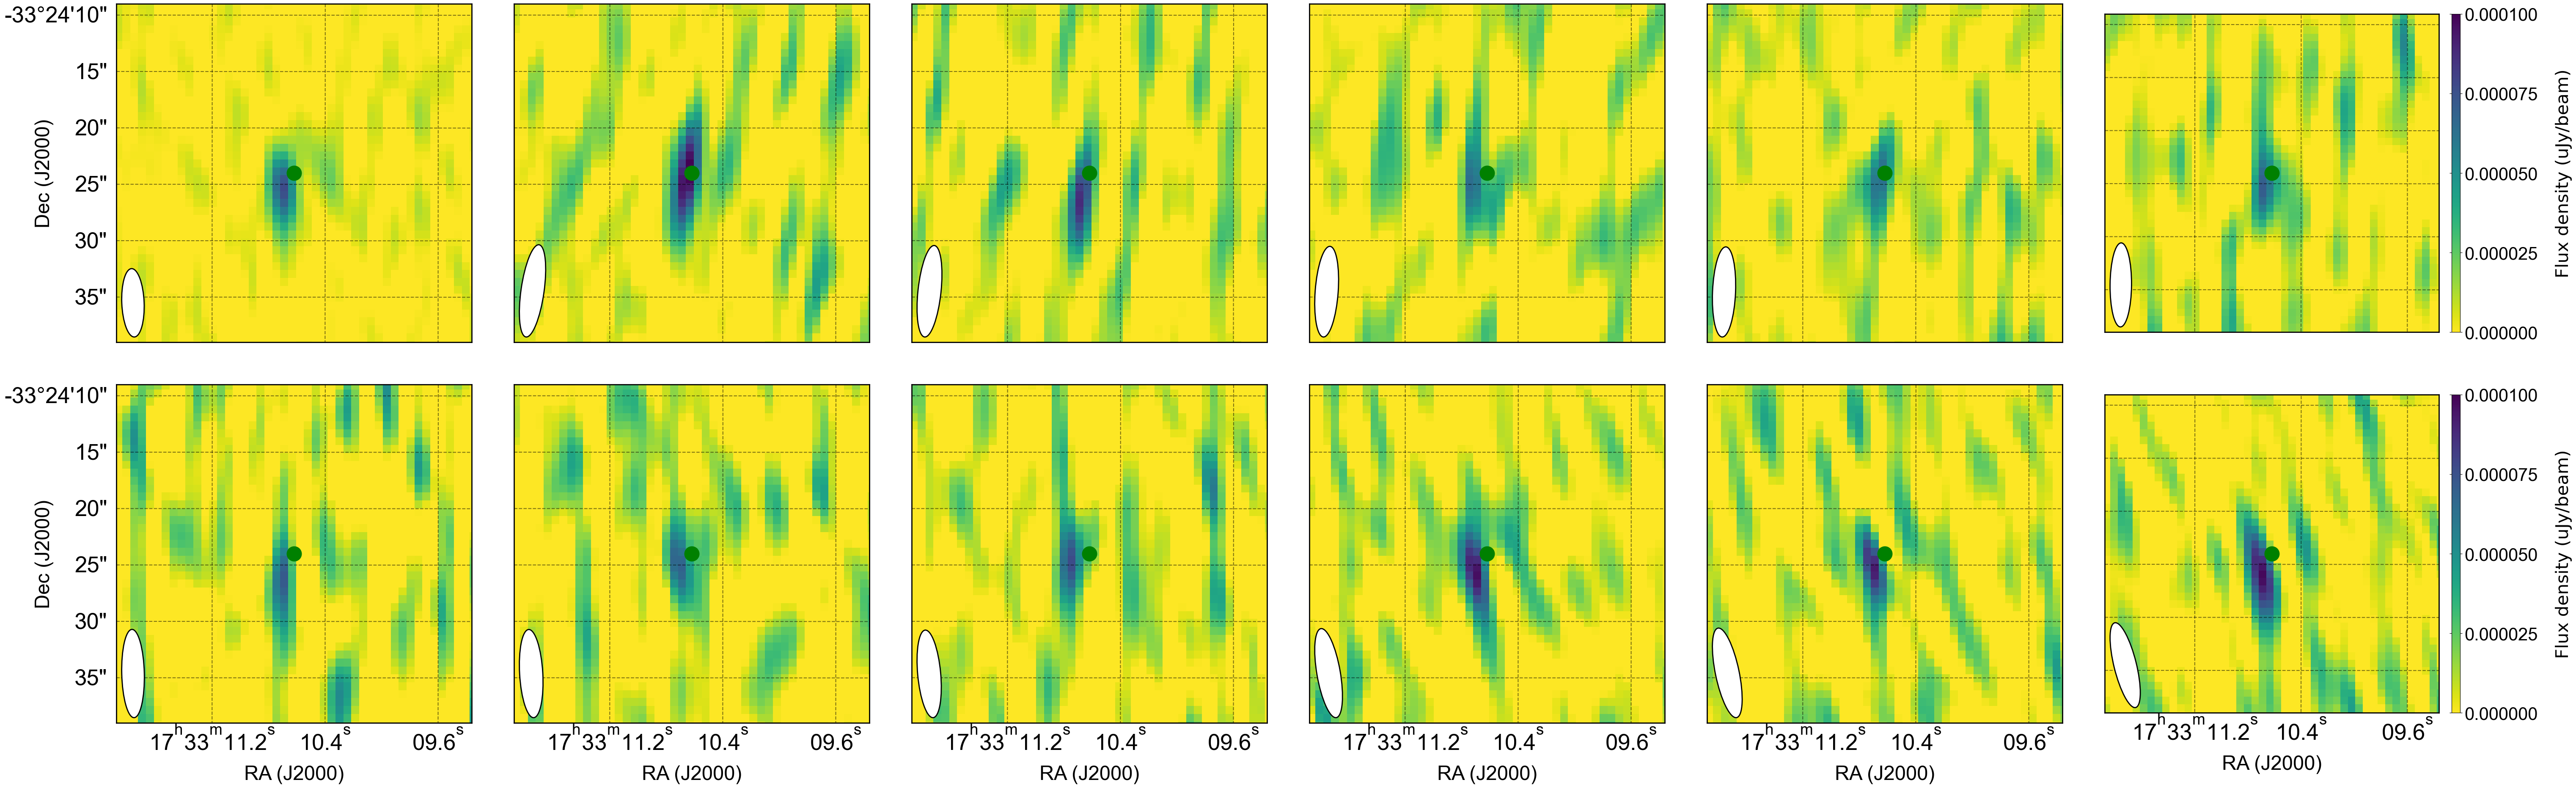

In [24]:
Figure6(ra=263.352542, dec=-33.388833, filename='Figure6_RapidBurster.pdf', cmap=CM)
Figure6(ra=263.294250, dec=-33.406667, filename='Figure6_CheckSource.pdf' , cmap=CM_check)